In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import pandas as pd
import anndata

In [2]:
path = './data'

# Data preprocessing

In [ ]:
def read_single_csv(input_path):
    df_chunk=pd.read_csv(input_path,chunksize=1000)
    res_chunk=[]
    for chunk in df_chunk:
        res_chunk.append(chunk)
    res_df=pd.concat(res_chunk)
    return res_df
gene = read_single_csv(f'{path}/tissue_expression_matrix_raw.csv')

In [3]:
gene

,GENE,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,...,T_178328,T_178329,T_178330,T_178331,T_178332,T_178333,T_178334,T_178335,T_178336,T_178337
0,AA467197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AI467606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AI593442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AU018091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AU021092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,Zp2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5409,Zrsr2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5410,Zswim2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5411,Zwint,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#细胞位置、类型等信息
spatial1 = pd.read_csv(f'{path}/tissue_spatial_STARmap_rep2.csv',index_col=0)
spatial2 = pd.read_csv(f'{path}/tissue_spatial_RIBOmap_rep2.csv',index_col=0)
spatial3 = pd.read_csv(f'{path}/tissue_spatial_RIBOmap_rep1.csv',index_col=0)

In [5]:
#spatial各列为
#1 x，2 y，3 cell_type,4 sample
spatial1 = spatial1.iloc[1:,[0,1,6]]
spatial1['sample'] = 'STARmap2'

spatial2 = spatial2.iloc[1:,[0,1,6]]
spatial2['sample'] = 'RIBOmap2'

spatial3 = spatial3.iloc[1:,[0,1,6]]
spatial3['sample'] = 'RIBOmap1'

spatial = pd.concat([spatial1,spatial2,spatial3])
spatial.columns = ['x','y','cell_type','sample']
spatial['x'] = spatial['x'].astype(float)
spatial['y'] = spatial['y'].astype(float)

In [6]:
gene_name=pd.DataFrame(index=gene['GENE'].values)
gene=gene.drop(columns='GENE')
gene=gene.T
gene=np.matrix(gene)
gene=np.array(gene)

In [7]:
print(gene)
print(spatial)
print(gene_name)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                x        y cell_type    sample
NAME                                          
T_0         415.0  24243.0       OPC  STARmap2
T_1         320.0  24274.0   CHO_PEP  STARmap2
T_2          95.0  24329.0       OLG  STARmap2
T_3         310.0  24369.0    DE_MEN  STARmap2
T_4         150.0  24529.0   CHO_PEP  STARmap2
...           ...      ...       ...       ...
T_178333  59185.0  14324.0   CHO_PEP  RIBOmap1
T_178334  59158.0  14689.0       MLG  RIBOmap1
T_178335  59143.0  15047.0       INH  RIBOmap1
T_178336  59127.0  14906.0   CHO_PEP  RIBOmap1
T_178337  59131.0  14440.0   CHO_PEP  RIBOmap1

[178338 rows x 4 columns]
Empty DataFrame
Columns: []
Index: [AA467197, AI467606, AI593442, AU018091, AU021092, AW551984, Aacs, Aadac, Aadat, Aard, Aatf, Abca1, Abca2, Abca3, Abca8a, Abca8b, Abcb10, Abcb1a, Abcb4, Abcb6, Abcc1, Abcc

In [8]:
adata=ad.AnnData(X=gene,obs=spatial,var=gene_name)
adata.obsm['spatial']=np.array(adata.obs[['x','y']])

In [11]:
RIBOmap2=adata[adata.obs['sample']=='RIBOmap2',:]
STARmap2=adata[adata.obs['sample']=='STARmap2',:]

In [26]:
print(RIBOmap2)
print(STARmap2)

View of AnnData object with n_obs × n_vars = 58692 × 5413
    obs: 'x', 'y', 'cell_type', 'sample'
    obsm: 'spatial'
View of AnnData object with n_obs × n_vars = 59165 × 5413
    obs: 'x', 'y', 'cell_type', 'sample'
    obsm: 'spatial'


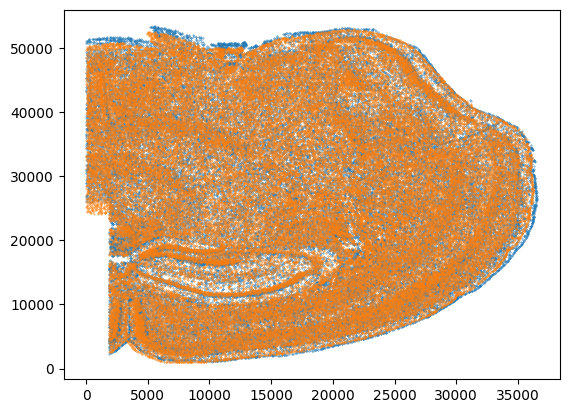

In [27]:
plt.scatter(RIBOmap2.obsm['spatial'][:,0],RIBOmap2.obsm['spatial'][:,1],s=0.1)
plt.scatter(STARmap2.obsm['spatial'][:,0],STARmap2.obsm['spatial'][:,1],s=0.1)

In [28]:
def process_data(adata, n_top_genes=2000, min_counts=500):
    adata.var_names_make_unique()
    sc.pp.filter_cells(adata, min_counts)
    sc.pp.filter_genes(adata, min_cells=10)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(
        adata, flavor="seurat", n_top_genes=n_top_genes, subset=True
    )
    return adata

RIBO_map2=process_data(RIBOmap2,min_counts=100)
STAR_map2=process_data(STARmap2,min_counts=180)

In [29]:
print(RIBOmap2)
print(STARmap2)

AnnData object with n_obs × n_vars = 46026 × 2000
    obs: 'x', 'y', 'cell_type', 'sample', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial'
    layers: 'counts'
AnnData object with n_obs × n_vars = 47271 × 2000
    obs: 'x', 'y', 'cell_type', 'sample', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial'
    layers: 'counts'


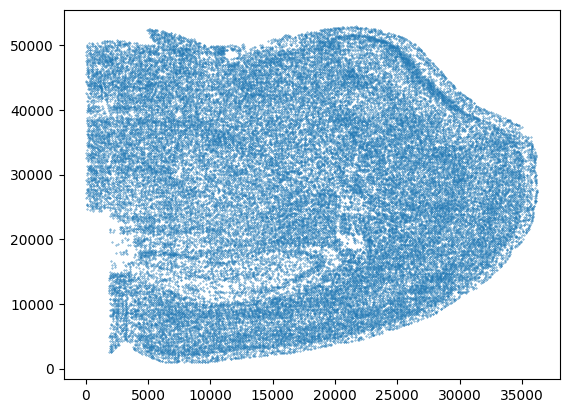

In [30]:
plt.scatter(STARmap2.obsm['spatial'][:,0],STARmap2.obsm['spatial'][:,1],s=0.1)

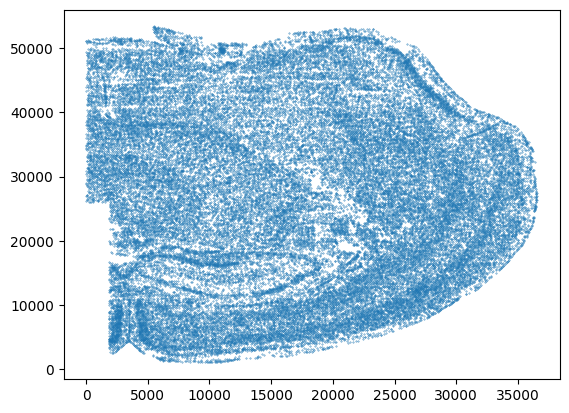

In [31]:
plt.scatter(RIBOmap2.obsm['spatial'][:,0],RIBOmap2.obsm['spatial'][:,1],s=0.1)

In [32]:
STARmap2_index=[]
RIBOmap2_index=[]
for i in range(STARmap2.shape[1]):
    if(STARmap2.var_names[i] in RIBOmap2.var_names):
        STARmap2_index.append(i)
        RIBOmap2_index.append(np.where(RIBOmap2.var_names==STARmap2.var_names[i])[0][0])

STARmap2=STARmap2[:,STARmap2_index]
RIBOmap2=RIBOmap2[:,RIBOmap2_index]

In [33]:
sc.tl.pca(STARmap2, svd_solver='arpack')
sc.tl.pca(RIBOmap2, svd_solver='arpack')

In [34]:
print(RIBOmap2)
print(STARmap2)

AnnData object with n_obs × n_vars = 46026 × 1154
    obs: 'x', 'y', 'cell_type', 'sample', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
AnnData object with n_obs × n_vars = 47271 × 1154
    obs: 'x', 'y', 'cell_type', 'sample', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    layers: 'counts'


In [35]:
RIBOmap2.write_h5ad(f'{path}/RIBOmap2.h5ad')
STARmap2.write_h5ad(f'{path}/STARmap2.h5ad')

In [56]:
for i in np.unique(RIBOmap2.obs['cell_type']):
    D = RIBOmap2.layers['counts'][np.where(RIBOmap2.obs['cell_type']==i)[0],:]
    D = pd.DataFrame(D)
    D.index = RIBOmap2[np.where(RIBOmap2.obs['cell_type']==i)[0],:].obs_names
    D.columns = RIBOmap2[np.where(RIBOmap2.obs['cell_type']==i)[0],:].var_names
    D.to_csv(f'{path}/RIBO_{i}.csv',header=True, index=True)
    
    D = RIBOmap2.layers['counts'][np.where(RIBOmap2.obs['cell_type']!=i)[0],:]
    D = pd.DataFrame(D)
    D.index = RIBOmap2[np.where(RIBOmap2.obs['cell_type']!=i)[0],:].obs_names
    D.columns = RIBOmap2[np.where(RIBOmap2.obs['cell_type']!=i)[0],:].var_names
    D.to_csv(f'{path}/RIBO_NOT_{i}.csv',header=True, index=True)

In [ ]:
cell_type = np.unique(RIBOmap2.obs['cell_type'])
pd.DataFrame(cell_type).to_csv(f'{path}/cell_type.csv',header=False, index=False)

## Using Prefast to get the embedding

In [34]:
RIBOmap2_celltype=pd.DataFrame(columns=RIBOmap2.var_names,index=np.unique(RIBOmap2.obs['cell_type']))
for i in RIBOmap2_celltype.index:
    RIBOmap2_celltype.loc[i]=np.sum(RIBOmap2.layers['counts'][RIBOmap2.obs['cell_type']==i,:],axis=0)

STARmap2_celltype=pd.DataFrame(columns=STARmap2.var_names,index=np.unique(RIBOmap2.obs['cell_type']))
for i in STARmap2_celltype.index:
    STARmap2_celltype.loc[i]=np.sum(STARmap2.layers['counts'][STARmap2.obs['cell_type']==i,:],axis=0)

In [35]:
pd.DataFrame(RIBOmap2_celltype).to_csv(f'{path}/RIBOmap2_celltype.csv',header=True, index=True)
pd.DataFrame(STARmap2_celltype).to_csv(f'{path}/STARmap2_celltype.csv',header=True, index=True)

In [36]:
RIBOmap2_X=pd.DataFrame(RIBOmap2.layers['counts'])
STARmap2_X=pd.DataFrame(STARmap2.layers['counts'])
RIBOmap2_X.index=RIBOmap2.obs_names
STARmap2_X.index=STARmap2.obs_names
RIBOmap2_X.columns=RIBOmap2.var_names
STARmap2_X.columns=STARmap2.var_names

pd.DataFrame(RIBOmap2_X).to_csv(f'{path}/RIBOmap2_X.csv',header=True, index=True)
pd.DataFrame(STARmap2_X).to_csv(f'{path}/STARmap2_X.csv',header=True, index=True)
pd.DataFrame(RIBOmap2.obsm['spatial']).to_csv(f'{path}/RIBOmap2_spatial.csv',header=False, index=False)
pd.DataFrame(STARmap2.obsm['spatial']).to_csv(f'{path}/STARmap2_spatial.csv',header=False, index=False)